In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
df=pd.read_csv('kc_house_data.csv')
df.drop(['date'], axis=1,inplace=True)

        

In [2]:
#df.drop(['id'],axis=1, inplace=True)
#print(df.at[0, 'bedrooms'])
#x = {}
#for i in range(len(df['id'])):
#    if df.at[i, 'id'] not in x: 
#        x[df.at[i, 'id']] = 1
#    else:
#        x[df.at[i, 'id']] += 1
#for i in x.keys():
#    if x[i] > 1:
#        print(i, x[i])


21613
21613


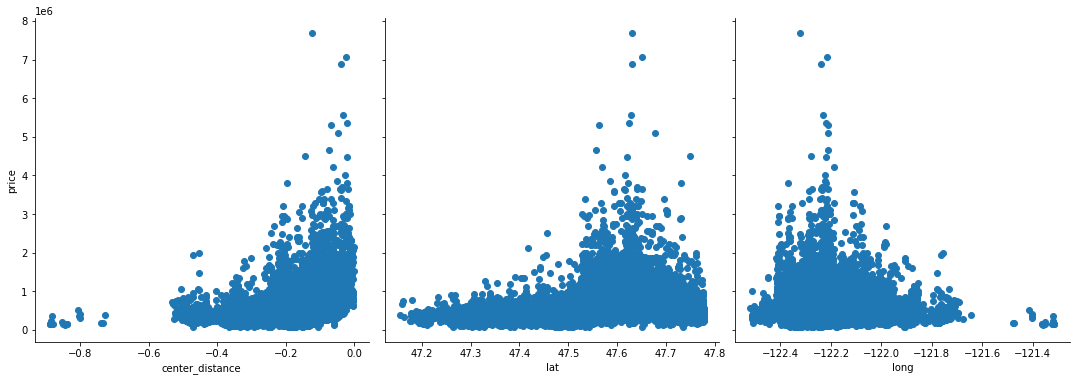

In [3]:
latSqrdList = [0]*len(df['lat'])
print(len(df['lat']))
latcenter = 47.63
longcenter = -122.2
for i in range(len(df['lat'])):
    latSqrdList[i] += (df.at[i, 'lat'] - latcenter) **2
    latSqrdList[i] += (df.at[i, 'long'] - longcenter) **2
    latSqrdList[i] = -(latSqrdList[i] ** 0.5)

print(len(latSqrdList))
df['center_distance'] = latSqrdList

df.head()

new=sns.PairGrid(df,x_vars=['center_distance', 'lat', 'long'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)
plt.show()

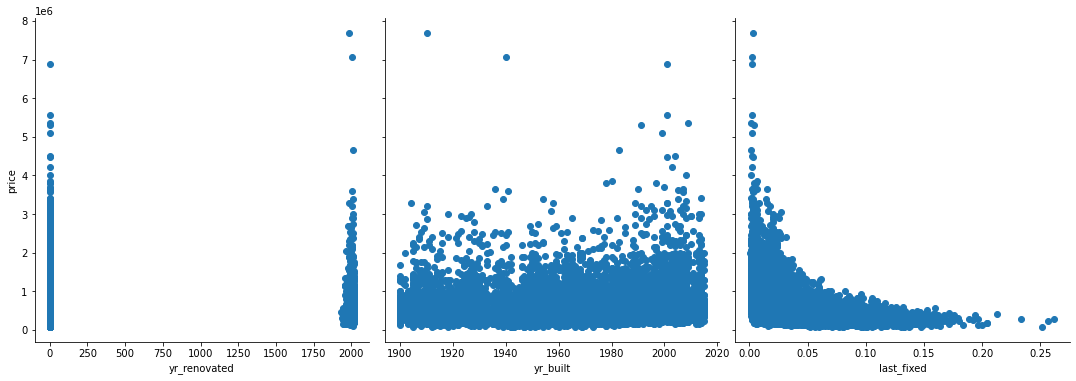

In [4]:

lastFixedList = [0]*len(df['yr_renovated'])
for i in range(len(df['yr_built'])):
    lastFixedList[i] = (2020- max(df.at[i, 'yr_built'], df.at[i, 'yr_renovated'])) / df.at[i, 'sqft_living']

df['last_fixed'] = lastFixedList

df.head()

new=sns.PairGrid(df,x_vars=['yr_renovated', 'yr_built', 'last_fixed'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)
plt.show()

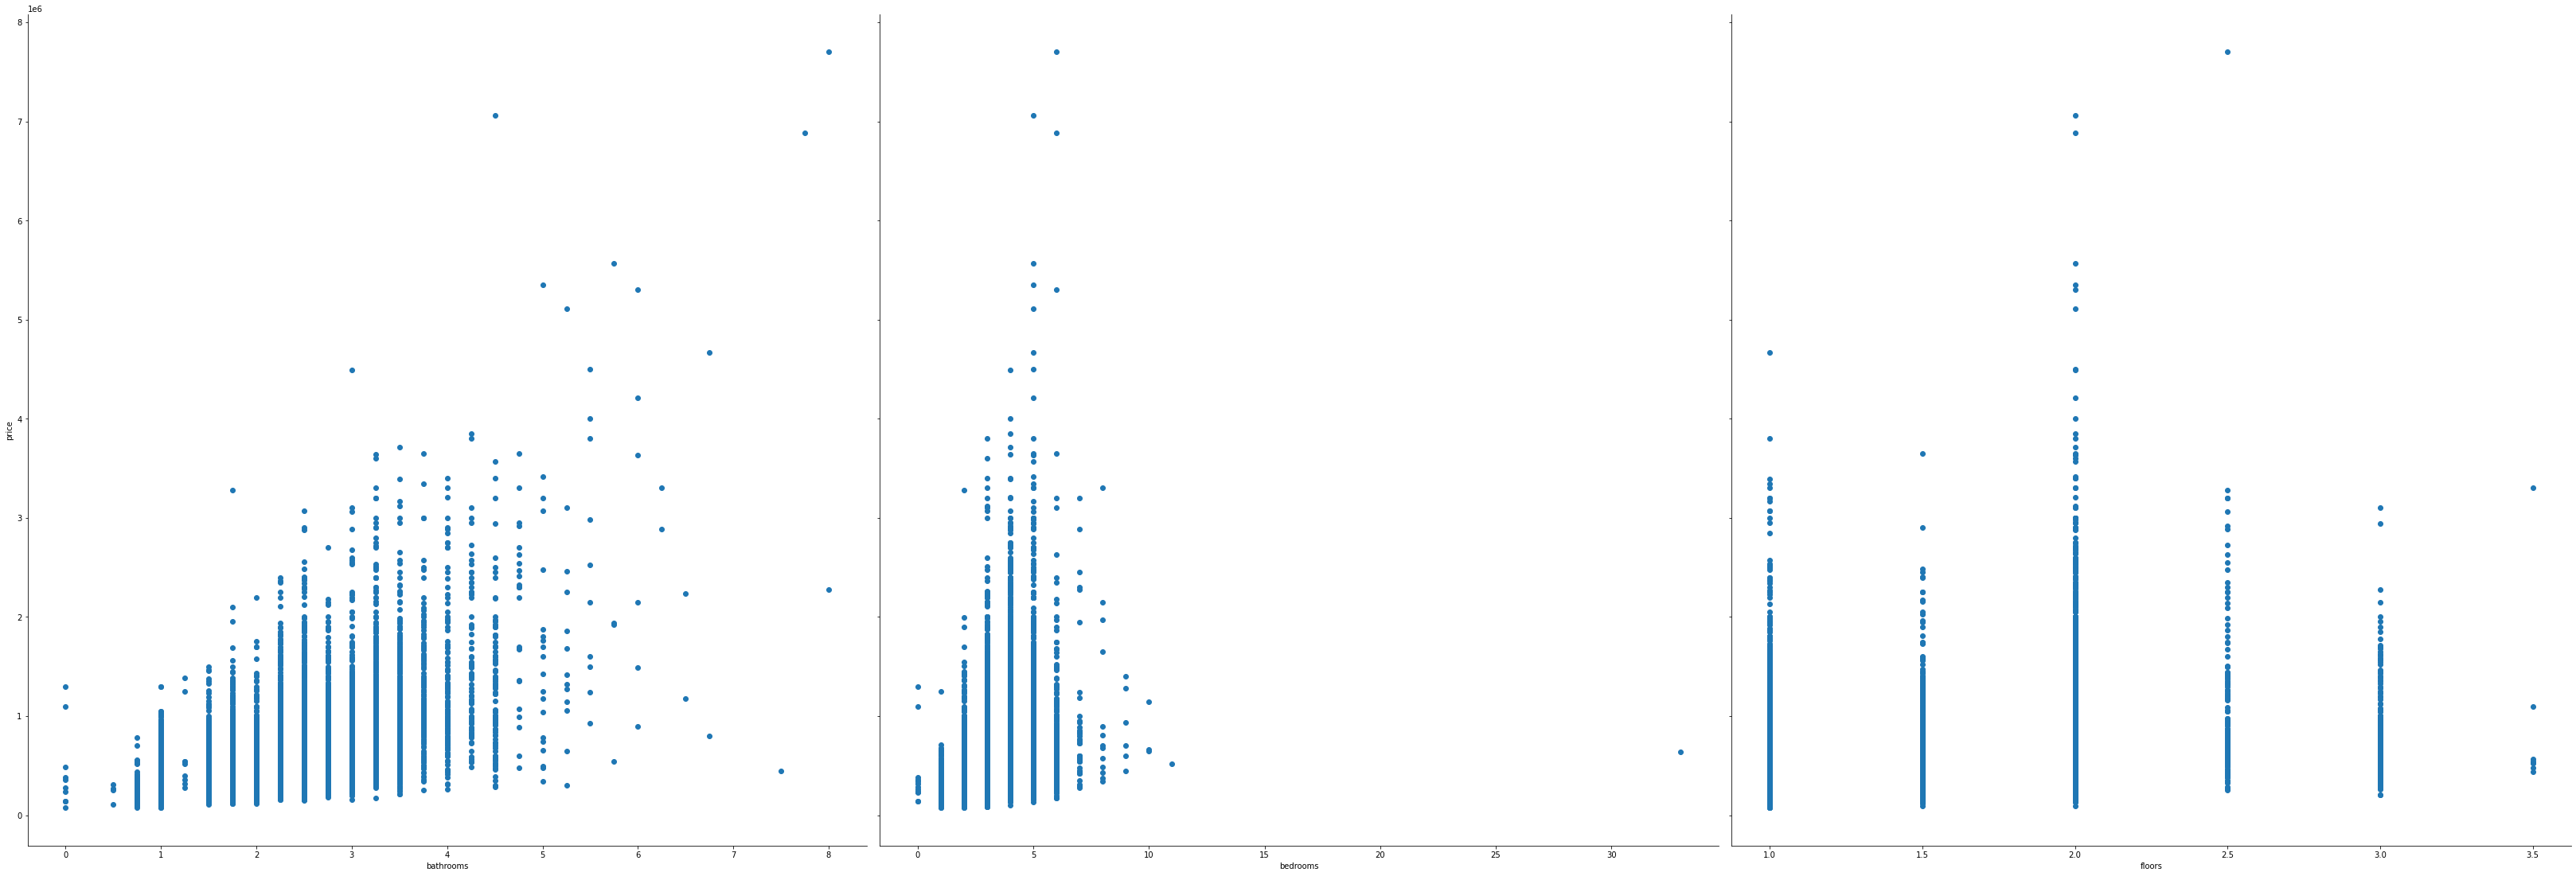

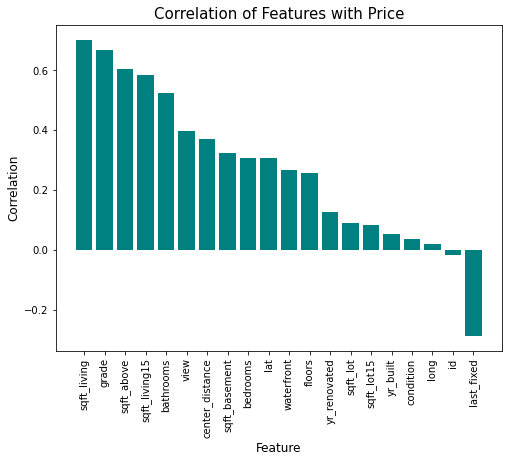

In [5]:
cor=df.corr()['price'].sort_values(ascending=False).drop(['price', 'zipcode'])
new=sns.PairGrid(df,x_vars=['bathrooms', 'bedrooms', 'floors'], y_vars=['price'],height=15,aspect=1)
new.map(plt.scatter)
plt.show()
plt.figure(figsize=(8,6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

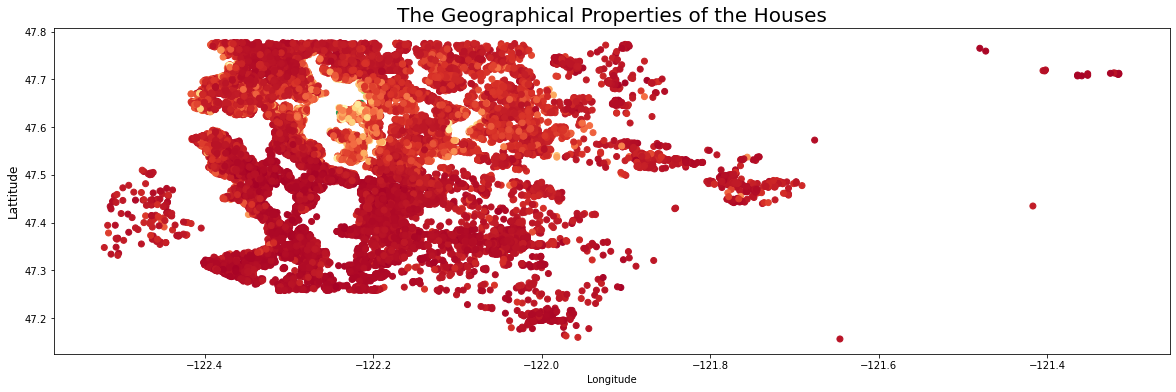

In [6]:
plt.figure(figsize=(20,6))
plt.scatter(x='long',y='lat',data=df, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=20)
plt.show()

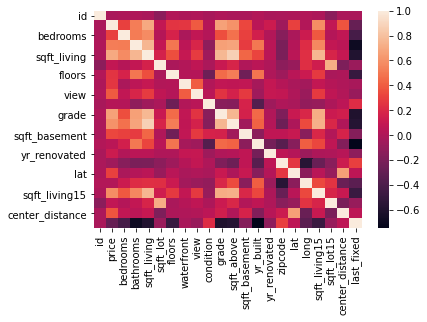

In [7]:
sns.heatmap(df.corr())
plt.show()

In [28]:
x_var = []
y_var = []
df.head()
#for i in range(len(df['id'])):
for i in range(100):
    tempList = []
    for e in df.keys():
        if(e == 'price'):
            y_var.append(df[e][i])
        else:
            tempList.append((df[e][i]))
    x_var.append(tempList)
theta = [1] * len(x_var[0]) 
        

In [29]:
it = 0
def dotProduct(x_i, theta):
    sum = 0
    for j in range(len(x_i)):
        sum += x_i[j] * theta[j]
    return sum

def vectorLength(v):
    sum = 0
    for i in v:
        sum += i ** 2
    return sum ** 0.5

def grafdientDecent(theta, y, x, alpha, error):
    
    print (it)
    gradient = [0] * len(x[0]) 
    for j in range(len(x[0])):
        for i in range(len(x)):
            gradient[j] += (y[i] + dotProduct(x[i], theta)) * x[i][j]
    for j in range(len(x[0])):
        theta[j] += theta[j] + alpha * gradient[j]
    if vectorLength(gradient) > error:
        print (vectorLength(gradient))
        return grafdientDecent(theta, y, x, alpha, error)
    else:
        return theta
print(grafdientDecent(theta, y_var, x_var, 0.000000001, 0.1))

0
3.052574273585082e+21
0
9.317293546103777e+33
0
2.843893423838336e+46
0
8.68034238282961e+58
0
2.649478466793321e+71
0
8.086934635075077e+83
0
2.468354153907468e+96
0
7.534093576923902e+108
0
2.2996119068242025e+121
0
7.01904597814509e+133
0
2.14240525964893e+146
0
inf
0


<ipython-input-29-901ca8c67d74>:11: RuntimeWarning: overflow encountered in double_scalars
  sum += i ** 2


inf
0
inf
0
inf
0
inf
0
inf
0
inf
0
inf
0
inf
0
inf
0
inf
0
inf
0
inf
0


<ipython-input-29-901ca8c67d74>:20: RuntimeWarning: overflow encountered in double_scalars
  gradient[j] += (y[i] + dotProduct(x[i], theta)) * x[i][j]


[inf, inf, inf, inf, inf, inf, nan, nan, inf, inf, inf, nan, inf, nan, inf, inf, -inf, inf, inf]


<ipython-input-29-901ca8c67d74>:20: RuntimeWarning: invalid value encountered in double_scalars
  gradient[j] += (y[i] + dotProduct(x[i], theta)) * x[i][j]
